# Comparing attenuations for last batches of Trip d'Automne (2019-2022)

Recipes differ only by **different yeast providers (Labo vs. WhiteLabs)** but the same strain was used

In [15]:
import pandas as pd

df = pd.read_excel("05-12-22_data.xlsx", index_col='Batch').sort_index()

In [10]:
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

In [2]:
# Overview sorted data
df.head()


,Start_date,min_gravity,min_pH,max_gravity,max_pH,ABV,Yeast,Gen
Batch,,,,,,,,
459,31/01/2019,1.3,4.32,15.6,5.13,NaN,LABO_2019,G5
467,14/03/2019,1.8,4.29,15.5,5.35,NaN,LABO_2019,G0
478,25/04/2019,2.1,4.32,15.7,5.15,NaN,LABO_2019,G1
508,01/08/2019,1.9,4.51,15.9,5.50,NaN,LABO_2019,G4
521,19/09/2019,1.9,4.28,15.2,5.40,NaN,LABO_2019,G0


## Attenuation and ABV calculation
**Attenuation** : Att = (OG - FG) / (FG * 100)

**Plato to SG** : Plato / 258,6 - ((Plato/258,2)*227,1) + 1

**ABV (original formula)** : ABV = (og – fg) * 131.25


In [16]:
# Attenuation
df['Attenuation'] = (df['max_gravity'] - df['min_gravity']) / df['max_gravity'] * 100

# ABV =B7/(258,6-((B7/258,2)*227,1))+1
df['ABV_calc'] = (
    ((df['max_gravity'] / (258.6 - (df['max_gravity'] / 258.2 * 227.1)) + 1) 
    - (df['min_gravity'] / (258.6 - (df['min_gravity'] / 258.2 * 227.1)) + 1))
    * 131.25
)
col_reorder = ['Start_date', 'Yeast', 'Gen', 'max_gravity', 'max_pH', 'min_gravity', 'min_pH', 'ABV', 'Attenuation', 'ABV_calc']
df = df.loc[:, col_reorder]
df = df.rename(columns={'max_gravity' : 'OG', 'max_pH' : 'Original_pH', 'min_gravity' : 'FG', 'min_pH' : 'Final_pH'})
df = df.drop(columns='ABV')

## Comparing LABO_2019 vs. LABO_2020+ vs. WLP530

In [19]:
# Summary of data collected
df.round(1)


,Start_date,Yeast,Gen,OG,Original_pH,FG,Final_pH,Attenuation,ABV_calc
Batch,,,,,,,,,
459,31/01/2019,LABO_2019,G5,15.6,5.1,1.3,4.3,91.7,7.7
467,14/03/2019,LABO_2019,G0,15.5,5.4,1.8,4.3,88.4,7.4
478,25/04/2019,LABO_2019,G1,15.7,5.2,2.1,4.3,86.6,7.3
508,01/08/2019,LABO_2019,G4,15.9,5.5,1.9,4.5,88.1,7.6
521,19/09/2019,LABO_2019,G0,15.2,5.4,1.9,4.3,87.5,7.2
533,31/10/2019,LABO_2019,G1,15.2,5.4,1.7,4.4,88.8,7.3
672,14/01/2022,LABO_2020+,G3,15.3,5.2,3.4,4.3,77.8,6.4
680,01/03/2022,LABO_2020+,G0,15.7,5.0,2.4,4.0,84.7,7.2
686,05/04/2022,LABO_2020+,G1,16.0,5.2,2.7,4.2,83.1,7.2


**OG/FG, attenuation and ABV comparisons per yeast**

In [27]:
def bar_labels(ax_name, ax_num) :
    for i in ax_name[ax_num].containers : 
        ax_name[ax_num].bar_label(i, fontsize=12, label_type='center', fmt='%.1f')

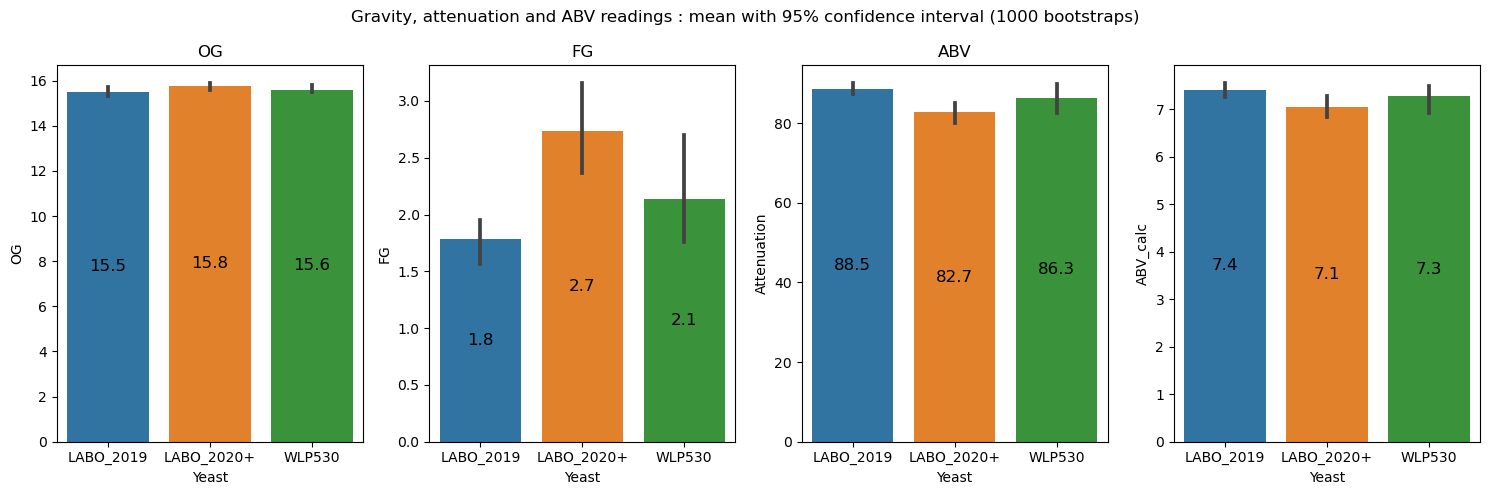

In [33]:
fig, axes = plt.subplots(1, 4, figsize=(15,5))
fig.suptitle('Gravity, attenuation and ABV readings : mean with 95% confidence interval (1000 bootstraps)')
sns.barplot(ax=axes[0], data=df, x='Yeast', y='OG')
axes[0].set_title('OG')
bar_labels(axes, 0)

sns.barplot(ax=axes[1],data=df, x='Yeast', y='FG')
axes[1].set_title('FG')
bar_labels(axes, 1)

sns.barplot(ax=axes[2],data=df, x='Yeast', y='Attenuation')
axes[2].set_title('ABV')
bar_labels(axes, 2)

sns.barplot(ax=axes[3],data=df, x='Yeast', y='ABV_calc')
axes[2].set_title('ABV')
bar_labels(axes, 3)

fig.tight_layout()

**Limitation in the number of batches (especially for WLP530, more data coming soon...)**

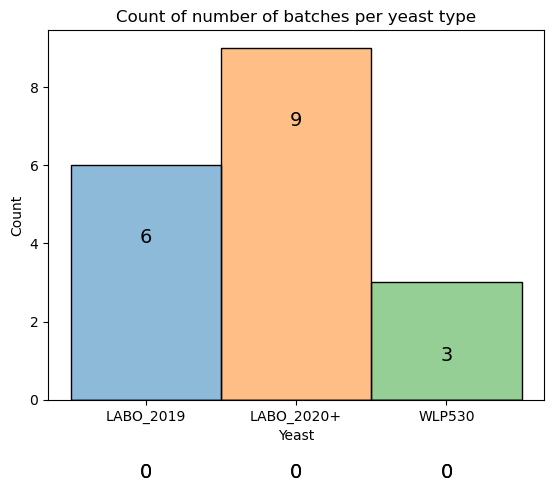

In [78]:

fig, ax = plt.subplots()
ax.set(title='Count of number of batches per yeast type')
sns.histplot(df, x='Yeast', hue='Yeast', legend=False)
# label each bar in histogram
for p in ax.patches:
 height = p.get_height()
 ax.text(x = p.get_x()+(p.get_width()/2), y = height - 2, s = '{:.0f}'.format(height), ha = 'center', fontsize=14)



**Differences in generations ? Not really apparent since FGs are all over the place regardless of Yeast**

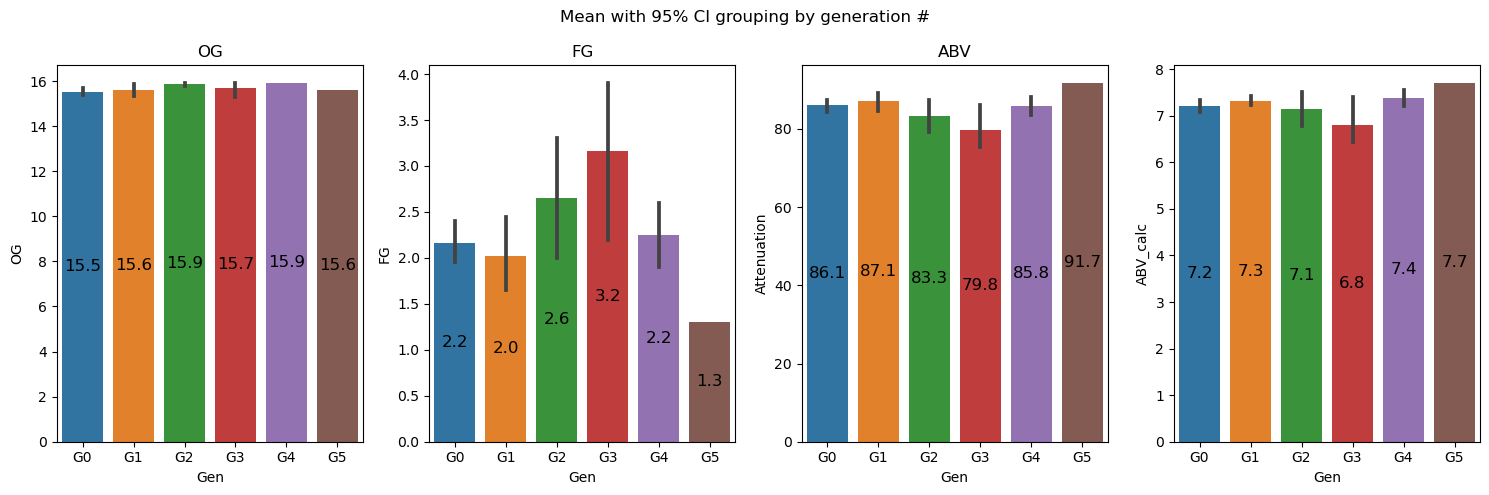

In [86]:
df_gen = df.sort_values('Gen')
fig, axes = plt.subplots(1, 4, figsize=(15,5))
fig.suptitle('Mean with 95% CI grouping by generation #')
sns.barplot(ax=axes[0], data=df_gen, x='Gen', y='OG')
axes[0].set_title('OG')
bar_labels(axes, 0)

sns.barplot(ax=axes[1],data=df_gen, x='Gen', y='FG')
axes[1].set_title('FG')
bar_labels(axes, 1)

sns.barplot(ax=axes[2],data=df_gen, x='Gen', y='Attenuation')
axes[2].set_title('ABV')
bar_labels(axes, 2)

sns.barplot(ax=axes[3],data=df_gen, x='Gen', y='ABV_calc')
axes[2].set_title('ABV')
bar_labels(axes, 3)

fig.tight_layout()